In [1]:
# Import Necessary Modules to start the analysis
# Other needed libraries we will import as we go 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# We are given a data where we see certain feelings expressed in words and what emotions they fall under
- Need to take feelings as input 
- emotion would be the output
- We need to perform all the Text Preprocessing steps
- Build a model that can predict emotion based on feeling given

In [3]:
# Name the columns logically
colNames = ['feeling','emotion']

In [4]:
# load data from csv semi-colon seperated file
emotions = pd.read_csv(r"C:\Users\Kishore\197\MachineLearning\files_fonts\Emotions_detection_based_on_reviews\emotions.csv",sep = ";",header=None,names=colNames)

In [5]:
emotions

,feeling,emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger


- We have 16000 rows of data
- Columns have been named appropriately as feeling and emotion
- We would consider feeling as input feature and emotion as taget column

In [6]:
emotions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   feeling  16000 non-null  object
 1   emotion  16000 non-null  object
dtypes: object(2)
memory usage: 250.1+ KB


- No NULL values
- Datatypes are correct

In [7]:
emotions['emotion'].value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: emotion, dtype: int64

- Check different emotions counts
- We see that the dataset is imbalanced with more number of joy and sadness compared to other emotions

In [8]:
emotions['feeling'][emotions['emotion']=='sadness']

0                                  i didnt feel humiliated
1        i can go from feeling so hopeless to so damned...
5        ive been feeling a little burdened lately wasn...
10       i feel like i have to make the suffering i m s...
13                      i feel low energy i m just thirsty
                               ...                        
15988              i feel pathetic because im still single
15991    i have wanted to perhaps convey my feelings of...
15995    i just had a very brief time in the beanbag an...
15996    i am now turning and i feel pathetic that i am...
15999    i know a lot but i feel so stupid because i ca...
Name: feeling, Length: 4666, dtype: object

In [9]:
emotions['emotion'].unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

# Let us see what words stand out for each emotion by creating a word cloud:

In [10]:
# pip install wordcloud

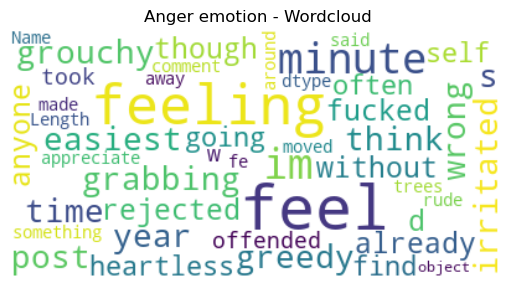

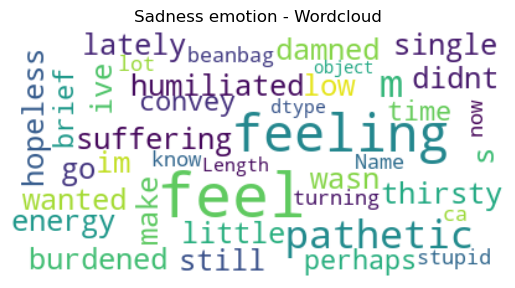

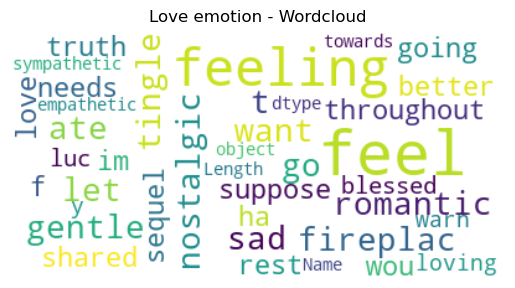

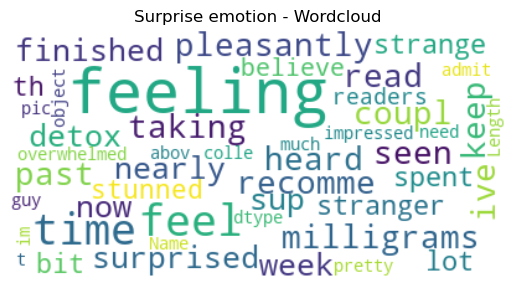

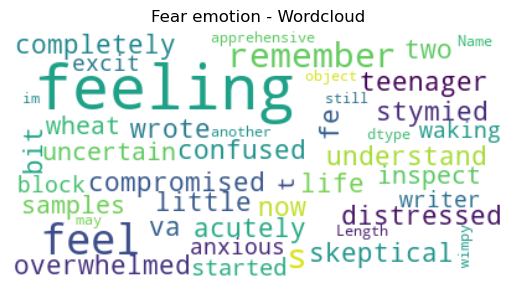

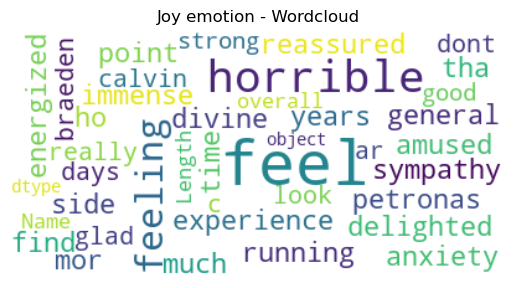

In [11]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
 
# Wordcloud with sadness emotion
anger_emotion = emotions['feeling'][emotions['emotion']=='anger']
stop_words = list(STOPWORDS)
anger_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords = stop_words).generate(str(anger_emotion))
plt.figure()
plt.title("Anger emotion - Wordcloud")
plt.imshow(anger_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Wordcloud with anger emotion
sadness_emotion = emotions['feeling'][emotions['emotion']=='sadness']
stop_words = list(STOPWORDS)
sadness_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords = stop_words).generate(str(sadness_emotion))
plt.figure()
plt.title("Sadness emotion - Wordcloud")
plt.imshow(sadness_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


# Wordcloud with love emotion
love_emotion = emotions['feeling'][emotions['emotion']=='love']
stop_words = list(STOPWORDS)
love_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords = stop_words).generate(str(love_emotion))
plt.figure()
plt.title("Love emotion - Wordcloud")
plt.imshow(love_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


# Wordcloud with surprise emotion
surprise_emotion = emotions['feeling'][emotions['emotion']=='surprise']
stop_words = list(STOPWORDS)
surprise_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords = stop_words).generate(str(surprise_emotion))
plt.figure()
plt.title("Surprise emotion - Wordcloud")
plt.imshow(surprise_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


# Wordcloud with fear emotion
fear_emotion = emotions['feeling'][emotions['emotion']=='fear']
stop_words = list(STOPWORDS)
fear_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords = stop_words).generate(str(fear_emotion))
plt.figure()
plt.title("Fear emotion - Wordcloud")
plt.imshow(fear_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Wordcloud with joy emotion
joy_emotion = emotions['feeling'][emotions['emotion']=='joy']
stop_words = list(STOPWORDS)
joy_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords = stop_words).generate(str(joy_emotion))
plt.figure()
plt.title("Joy emotion - Wordcloud")
plt.imshow(joy_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()




# We will have to convert the Text data to structured numerical data
- Machine only understands numerical data so first this data needs to be converted
- Before we convert to numerical data there are several preprocessing steps that we can use as data cleaning steps

# Few Text preprocessing steps:
- Convert to uniform case
- Remove html tags (not needed here)
- Remove urls (not needed here)
- Remove Newline (not needed here)
- Remove Special characters (non needed here)
- Remove Stopwords
- Stemming / Lemmetization (we will use Lemmetization here)

In [12]:
# Find below Recipe of Custom Functions for each step

# Covert to Lower case
def lowerCase(text):
    #return text.lower()
    return text.str.lower()

# Remove html tags
def removeHtmlTags(text):
    return text.apply(lambda x:re.sub(r'<.*?>',"",x))

# Remove Urls
def removeUrls(text):
    return text.apply(lambda x:re.sub(r'https?://\S+|www\.S\+',"",x))

# Remove NewLine 
def handleNewLine(text):
    return text.apply(lambda x:re.sub(r'\n',' ',x))

# Remove Special Characters
def removeSpecialChars(text):
    return text.apply(lambda x:re.sub(r'[^0-1a-zA-Z]',' ',x))

# Remove Stopwords
def removeStopwords(text):
    import nltk
    from nltk.corpus import stopwords
    nltk.download('stopwords')
    stop_words = set(stopwords.words('english'))

    return text.apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

# Stemming
def stemTokens(text):
    from nltk.stem import SnowballStemmer
    snowballStemmer = SnowballStemmer('english')
    
    return text.apply(lambda x: ' '.join([snowballStemmer.stem(word) for word in x.split() if word != " "]))

# Lemmetization
def lemTokens(text):
    nltk.download('wordnet')
    nltk.download('omw-1.4')
    from nltk.stem import WordNetLemmatizer
    lem = WordNetLemmatizer()
 
    return text.apply(lambda x: ' '.join([lem.lemmatize(word) for word in x.split() if word != " "]))


In [13]:
# We will be creating a Pipeline for various Preprocessing steps
#  To Display Pipeline
from sklearn import set_config
set_config(display='diagram')

In [14]:
# Importing libraries needed
import nltk
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import FunctionTransformer

In [15]:
# Create pipe# Create pipeline
text_prep_pipeline = Pipeline([
    ('lowerCase', FunctionTransformer(lowerCase)),
    ('removeHtmlTags', FunctionTransformer(removeHtmlTags)),
    ('removeUrls', FunctionTransformer(removeUrls)),
    ('handleNewLine', FunctionTransformer(handleNewLine)),
    ('removeSpecialChars', FunctionTransformer(removeSpecialChars)),
    ('removeStopwords', FunctionTransformer(removeStopwords)),
    ('lemTokens', FunctionTransformer(lemTokens)),
])


In [16]:
display(text_prep_pipeline)

Pipeline(steps=[('lowerCase',
                 FunctionTransformer(func=<function lowerCase at 0x0000027DF8D4DE50>)),
                ('removeHtmlTags',
                 FunctionTransformer(func=<function removeHtmlTags at 0x0000027DF8D4DDC0>)),
                ('removeUrls',
                 FunctionTransformer(func=<function removeUrls at 0x0000027DF8D5E040>)),
                ('handleNewLine',
                 FunctionTransformer(func=<function handleNewLine at 0x0000027DF8D5E0D0>)),
                ('removeSpecialChars',
                 FunctionTransformer(func=<function removeSpecialChars at 0x0000027DF8D5E160>)),
                ('removeStopwords',
                 FunctionTransformer(func=<function removeStopwords at 0x0000027DF8D5E1F0>)),
                ('lemTokens',
                 FunctionTransformer(func=<function lemTokens at 0x0000027DF8D5E310>))])

In [17]:
# For Building model importing required modules
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score as acs
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [18]:
# Recognize predictor or Input and target or output features for Machine learning
X = emotions['feeling']
y = emotions['emotion']

In [19]:
# Perform pre-processing on input feature by applying the pipeline 
X_prep = text_prep_pipeline.fit_transform(X)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kishore\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Kishore\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Kishore\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [20]:
type(X_prep),type(y)

(pandas.core.series.Series, pandas.core.series.Series)

In [21]:
data = {'feeling':X_prep,'emotion':y}

In [22]:
emotions = pd.concat(data,axis=1)
emotions

,feeling,emotion
0,didnt feel humiliated,sadness
1,go feeling hopeless damned hopeful around some...,sadness
2,im grabbing minute post feel greedy wrong,anger
3,ever feeling nostalgic fireplace know still pr...,love
4,feeling grouchy,anger
...,...,...
15995,brief time beanbag said anna feel like beaten,sadness
15996,turning feel pathetic still waiting table subb...,sadness
15997,feel strong good overall,joy
15998,feel like rude comment im glad,anger


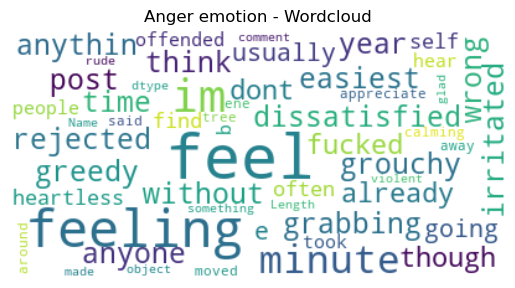

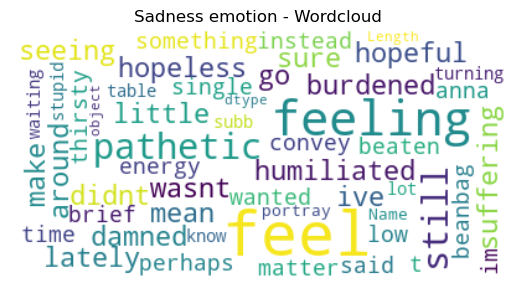

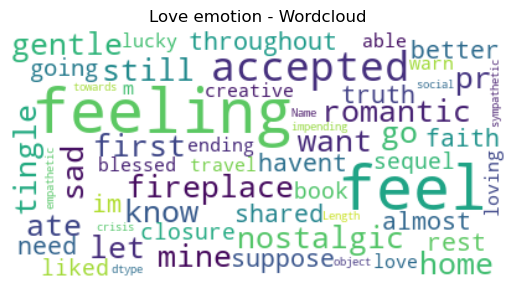

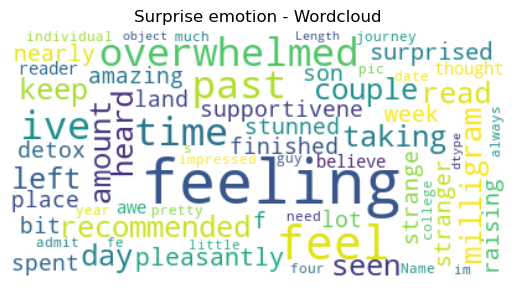

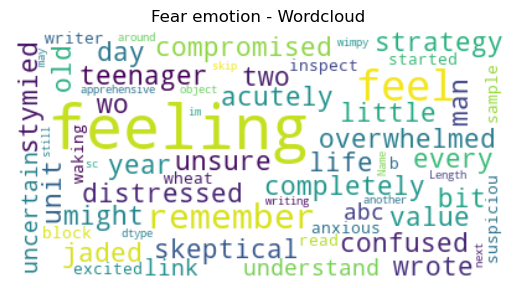

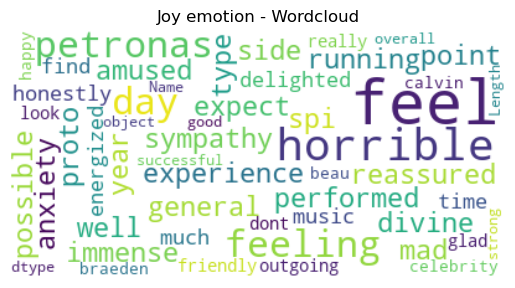

In [23]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
 
# Wordcloud with sadness emotion
anger_emotion = emotions['feeling'][emotions['emotion']=='anger']
stop_words = list(STOPWORDS)
anger_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords = stop_words).generate(str(anger_emotion))
plt.figure()
plt.title("Anger emotion - Wordcloud")
plt.imshow(anger_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Wordcloud with anger emotion
sadness_emotion = emotions['feeling'][emotions['emotion']=='sadness']
stop_words = list(STOPWORDS)
sadness_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords = stop_words).generate(str(sadness_emotion))
plt.figure()
plt.title("Sadness emotion - Wordcloud")
plt.imshow(sadness_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


# Wordcloud with love emotion
love_emotion = emotions['feeling'][emotions['emotion']=='love']
stop_words = list(STOPWORDS)
love_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords = stop_words).generate(str(love_emotion))
plt.figure()
plt.title("Love emotion - Wordcloud")
plt.imshow(love_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


# Wordcloud with surprise emotion
surprise_emotion = emotions['feeling'][emotions['emotion']=='surprise']
stop_words = list(STOPWORDS)
surprise_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords = stop_words).generate(str(surprise_emotion))
plt.figure()
plt.title("Surprise emotion - Wordcloud")
plt.imshow(surprise_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


# Wordcloud with fear emotion
fear_emotion = emotions['feeling'][emotions['emotion']=='fear']
stop_words = list(STOPWORDS)
fear_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords = stop_words).generate(str(fear_emotion))
plt.figure()
plt.title("Fear emotion - Wordcloud")
plt.imshow(fear_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Wordcloud with joy emotion
joy_emotion = emotions['feeling'][emotions['emotion']=='joy']
stop_words = list(STOPWORDS)
joy_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords = stop_words).generate(str(joy_emotion))
plt.figure()
plt.title("Joy emotion - Wordcloud")
plt.imshow(joy_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [24]:
#  split X & y in to xTrain, xTest, yTrain, yTest
# if we pass 2 arrays we get train & test of the first array, then train & test of the second array
# random_state parameter in test_train_split is simillar to random_seed parameter in random function
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X_prep,y,
                                                test_size= 0.32,
                                                random_state= 22
                                               )

In [25]:
# check if input variable train and test has same size as target variable
# the rows have to be same for us to proceed
xTrain.shape, xTest.shape, len(yTrain), len(yTest)

((10880,), (5120,), 10880, 5120)

# Pipeline
- Vectorization (Count vectorizer, Tfidf vectorizer)
- Classification algorithms (DecisionTree Classifier, Naive Bayes Classifier, Logistic Regression)

In [26]:

dtc = DecisionTreeClassifier()

dtc_pipeline = Pipeline(steps=[
    ('vectorize', TfidfVectorizer()),
    ('classifier', dtc)
])

In [27]:
dtc_pipeline.fit(xTrain, yTrain)

Pipeline(steps=[('vectorize', TfidfVectorizer()),
                ('classifier', DecisionTreeClassifier())])

In [28]:
yTrainPred = dtc_pipeline.predict(xTrain)
acs(yTrain, yTrainPred)

0.9985294117647059

In [29]:
yTestPred = dtc_pipeline.predict(xTest)
acs(yTest, yTestPred)

0.871875

# Now we will use GridSearch to tune Hyperparameters
- We can tune ngram_range= [(1,1),(1,2)] for Uni and Bi Grams
- We can search for Count and Tfidf vectorizers also
- We will search these vectorizers in combination of various classifier models
- Here we use Logistic Regression and Decision Tree classifiers
- We will tune the parameters inside the Classifiers also to find best model

In [30]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [31]:
# We will mention all the hyperparameters we want to tune
# We can also see what the best approach is like vectorization and model
search_space = [{"classifier": [LogisticRegression()],
                                   "classifier__penalty": ["l1", "l2"],
                                   "classifier__C": np.logspace(0, 4, 10),
                 'vectorize':[CountVectorizer(),TfidfVectorizer()],
                 'vectorize__ngram_range':[(1,1),(1,2)],
                    },
                {"classifier": [DecisionTreeClassifier()],
                                   "classifier__criterion": ['gini','entropy','log_loss'],
                                   "classifier__max_depth": np.arange(2,11),
                 'vectorize':[CountVectorizer(),TfidfVectorizer()],
                 'vectorize__ngram_range':[(1,1),(1,2)],
                    }]

gs = GridSearchCV(dtc_pipeline, 
                  search_space, 
                  cv=5 
                 )

In [32]:
# We will use the best model to fit the train data
gs.fit(xTrain,yTrain)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vectorize', TfidfVectorizer()),
                                       ('classifier',
                                        DecisionTreeClassifier())]),
             param_grid=[{'classifier': [LogisticRegression(C=59.94842503189409)],
                          'classifier__C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.0000...
                          'classifier__penalty': ['l1', 'l2'],
                          'vectorize': [CountVectorizer(ngram_range=(1, 2)),
                                        TfidfVectorizer()],
                          'vectorize__ngram_range': [(1, 1), (1, 2)]},
                         {'classifier': [DecisionTreeClassifier()],
                          'classifier__criterion': ['gini', 'entropy',
                                                    'log_loss'],
                          'classifier__max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                          'vectorize': [CountVectorizer(), TfidfVectorizer()],
                          'vectorize__ngram_range': [(1, 1), (1, 2)]}])

In [33]:
# We can see the best parameters that were fitted
gs.best_params_

{'classifier': LogisticRegression(C=59.94842503189409),
 'classifier__C': 59.94842503189409,
 'classifier__penalty': 'l2',
 'vectorize': CountVectorizer(ngram_range=(1, 2)),
 'vectorize__ngram_range': (1, 2)}

In [34]:
# Using dataframe we can see the results
gs_df = pd.DataFrame(gs.cv_results_)
gs_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__C,param_classifier__penalty,param_vectorize,param_vectorize__ngram_range,param_classifier__criterion,param_classifier__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.066804,0.002027,0.000000,0.000000,LogisticRegression(C=59.94842503189409),1.0,l1,"CountVectorizer(ngram_range=(1, 2))","(1, 1)",NaN,NaN,{'classifier': LogisticRegression(C=59.9484250...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,149
1,0.178756,0.004967,0.000000,0.000000,LogisticRegression(C=59.94842503189409),1.0,l1,"CountVectorizer(ngram_range=(1, 2))","(1, 2)",NaN,NaN,{'classifier': LogisticRegression(C=59.9484250...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,149
2,0.067320,0.003783,0.000000,0.000000,LogisticRegression(C=59.94842503189409),1.0,l1,TfidfVectorizer(),"(1, 1)",NaN,NaN,{'classifier': LogisticRegression(C=59.9484250...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,149
3,0.189649,0.006303,0.000000,0.000000,LogisticRegression(C=59.94842503189409),1.0,l1,TfidfVectorizer(),"(1, 2)",NaN,NaN,{'classifier': LogisticRegression(C=59.9484250...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,149
4,1.039891,0.219779,0.025257,0.003560,LogisticRegression(C=59.94842503189409),1.0,l2,"CountVectorizer(ngram_range=(1, 2))","(1, 1)",NaN,NaN,{'classifier': LogisticRegression(C=59.9484250...,0.882353,0.868107,0.892463,0.889706,0.883732,0.883272,0.008449,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,1.399734,0.056315,0.055043,0.011354,DecisionTreeClassifier(),NaN,NaN,TfidfVectorizer(),"(1, 2)",log_loss,9,"{'classifier': DecisionTreeClassifier(), 'clas...",0.363511,0.359375,0.360294,0.364430,0.361673,0.361857,0.001897,55
184,0.287559,0.014869,0.025304,0.006924,DecisionTreeClassifier(),NaN,NaN,CountVectorizer(),"(1, 1)",log_loss,10,"{'classifier': DecisionTreeClassifier(), 'clas...",0.366268,0.361213,0.363511,0.366728,0.363971,0.364338,0.002001,41
185,1.324087,0.061283,0.040980,0.004679,DecisionTreeClassifier(),NaN,NaN,CountVectorizer(),"(1, 2)",log_loss,10,"{'classifier': DecisionTreeClassifier(), 'clas...",0.363511,0.361673,0.362132,0.367188,0.363971,0.363695,0.001941,43
186,0.476780,0.039542,0.028122,0.006256,DecisionTreeClassifier(),NaN,NaN,TfidfVectorizer(),"(1, 1)",log_loss,10,"{'classifier': DecisionTreeClassifier(), 'clas...",0.363511,0.360294,0.360754,0.365349,0.363051,0.362592,0.001861,51


In [35]:
# We will predict and using metrics check the accuracy
yTrainPred = gs.predict(xTrain)
acs(yTrain,yTrainPred)

0.9985294117647059

In [36]:
yTestPred = gs.predict(xTest)
acs(yTest,yTestPred)

0.8998046875

- the test accuracy is really good

In [37]:
# Will check the confusion matrix to see actual and predicted values
confusion_matrix(yTest,yTestPred)

array([[ 637,    8,   26,    4,   37,    2],
       [  27,  510,   25,    2,   31,   19],
       [   5,    5, 1639,   52,   38,    8],
       [   1,    1,   89,  326,    3,    0],
       [  32,   13,   33,    4, 1362,    3],
       [   2,   23,   14,    0,    6,  133]], dtype=int64)

# Conclusion
- Best Vectorizer for emotion analysis is Count Vectorizer of Bi-grams
- Best model for emotion analysis is Logistic Regression
- Test accurasy is close to 90%
